# MLE challenge - Train model notebook

### Notebook 2

In this notebook, we train the model with a few features (for reasons of time and complexity in solving the challenge). It also shows how to persist the model in a file, load it into memory and then make a predict.



In [97]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score, 
    plot_confusion_matrix, precision_score, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier

#### Read dataset

In [98]:
df = pd.read_csv('train_model.csv')

In [99]:
df.head()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,status
0,5008814,61,-1000,0,108.687047,0,0
1,5008814,61,-1000,1,105.141663,0,0
2,5008814,61,-1000,2,103.932416,0,0
3,5008814,61,-1000,3,104.658406,0,0
4,5008814,61,-1000,4,108.677355,0,0


In [100]:
df.dtypes

id                             int64
age                            int64
years_on_the_job               int64
nb_previous_loans              int64
avg_amount_loans_previous    float64
flag_own_car                   int64
status                         int64
dtype: object

<AxesSubplot:>

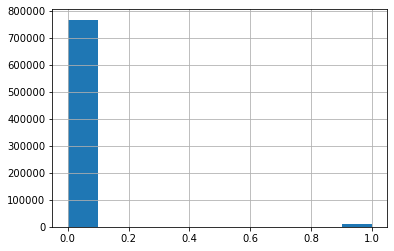

In [101]:
df.status.hist()

In [102]:
cust_df = df.copy()

In [103]:
cust_df.fillna(0, inplace=True)

## Train model

In [104]:
Y = cust_df['status']

cust_df.drop(['id', 'status'], axis=1, inplace=True)

X = cust_df

In [105]:
display(X)

,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car
0,61,-1000,0,108.687047,0
1,61,-1000,1,105.141663,0
2,61,-1000,2,103.932416,0
3,61,-1000,3,104.658406,0
4,61,-1000,4,108.677355,0
...,...,...,...,...,...
777710,30,5,8,120.927832,1
777711,30,5,9,121.888023,1
777712,30,5,10,124.837926,1
777713,30,5,11,123.916797,1


In [106]:
display(Y)

0         0
1         0
2         0
3         0
4         0
         ..
777710    0
777711    0
777712    0
777713    0
777714    0
Name: status, Length: 777715, dtype: int64

In [107]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X, Y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 123)

In [109]:
display(X_train)

,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car
479948,57,13,24,130.358165,1
1319532,52,8,19,137.179025,0
425103,55,-1000,21,139.023681,1
958733,44,1,3,138.701859,1
242646,60,-1000,20,140.790256,0
...,...,...,...,...,...
992221,39,17,3,145.695282,0
475217,31,5,1,114.580114,1
1322343,62,-1000,0,116.399397,0
166013,56,-1000,9,123.708870,0


Accuracy Score is 0.9332
Precision Score is 0.91688
Recall Score is 0.91688
        0       1
0  209991   19851
1   10856  218986


C:\Users\USER\miniconda3\envs\Bioconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


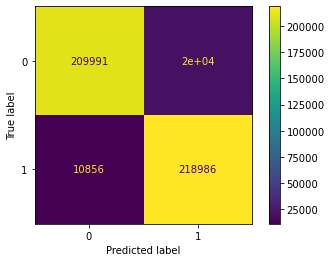

In [110]:
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(precision_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


C:\Users\USER\miniconda3\envs\Bioconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


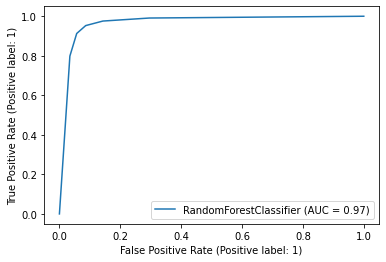

In [111]:
plot_roc_curve(model, X_test, y_test)
plt.show()

## Model persistance

In [112]:
from joblib import dump, load

In [113]:
# dump model
dump(model, 'model_risk.joblib') 

['model_risk.joblib']

### Load model & predict

In [114]:
my_model = load('model_risk.joblib') 

In [115]:
# example dict 'user_id' -> features
d = {
    '5008804': [32, 12, 2, 119.45, 1],
    '5008807': [29, 2, 1, 100, 0],
    '5008910': [42, 9, 2, 147.42, 0]
}

In [119]:
result = my_model.predict([d['5008910']])

C:\Users\USER\miniconda3\envs\Bioconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
d['5008804']

[32, 12, 2, 119.45, 1]

In [83]:
X_test

,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car
14503,48,21,6,144.490128,1
188350,58,8,10,125.747951,0
167457,28,7,5,141.844060,1
879569,36,2,11,129.541912,1
1273708,50,8,46,131.712475,0
...,...,...,...,...,...
694724,33,10,11,131.411232,1
1270988,34,2,18,131.993719,0
976365,42,0,6,124.684233,0
1365947,58,-1000,27,136.049797,0


In [120]:
print(result)

[1]


In [89]:
y_predict

array([0, 0, 0, ..., 1, 1, 0])